# AMAZON REVIEWS EDA - ALEXA PRODUCT 



## CONTENTS (Click on link to jump to the section):

* #### [Exploratory Data Analysis](#eda)
* #### [Text Cleaning](#text-clean)
* #### [Sentiment Analysis](#sentiment)
* #### [Bi-grams](#bigrams)
* #### [Tri-grams](#trigrams)
* #### [Model Building](#model)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib as mpl
import re

import string
import itertools
import collections 
import nltk
nltk.download('wordnet')
from wordcloud import WordCloud
from nltk.util import ngrams
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize, RegexpTokenizer
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# Setting the style for graphs
style.use('fivethirtyeight')
mpl.rcParams['figure.figsize'] = (10, 5)
mpl.rcParams['font.size'] = 15

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prath\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Importing the dataset
amazon_DF = pd.read_csv("alexa.csv")

In [3]:
# Size of the dataset
amazon_DF.shape

(3150, 5)

#### There are currently 4933 reviews in this dataset.

In [4]:
# Random Sample of 4 from dataset

amazon_DF.sample(5)

,rating,date,variation,verified_reviews,feedback
1322,5,21-Jul-18,Black Spot,I got this on Prime day and figured I'd see wh...,1
3143,5,30-Jul-18,Black Dot,Awesome device wish I bought one ages ago.,1
2901,5,30-Jul-18,White Dot,"Great price. I love my echo dot,",1
542,5,16-Jun-18,White,Purchased for my 83 year old mother-she loves ...,1
858,5,30-Jul-18,Heather Gray Fabric,so far love it working on getting more things ...,1


In [5]:
# Checking for Null Values
amazon_DF[amazon_DF['verified_reviews'].isnull()]

,rating,date,variation,verified_reviews,feedback


#### Review Number 4174 is missing so that shall be removed.

In [6]:
amazon_DF.dropna(axis = 0, inplace = True)

<a id = 'eda'></a>

# EXPLORATORY DATA ANAYSIS
# LENGTH OF REVIEWS

In [7]:
amazon_DF_1 = amazon_DF.copy()
amazon_DF_1["verified_reviews"] = amazon_DF_1["verified_reviews"].apply(str)

In [8]:
amazon_DF_1["Review Length"] = amazon_DF_1["verified_reviews"].apply(lambda w : len(re.findall(r'\w+', w)))

In [9]:
amazon_DF_1.sample(5)

,rating,date,variation,verified_reviews,feedback,Review Length
1852,5,28-Jul-18,Black Plus,The sound is wonderful and it just plain works...,1,24
2244,2,30-Jul-18,Configuration: Fire TV Stick,,0,0
1810,5,29-Jul-18,White Plus,Amazon Music is great. Love the ability to cre...,1,26
1685,5,28-Jul-18,Black Show,I have it in the kitchen. Great for news or mu...,1,28
1798,5,29-Jul-18,Black Plus,Great product. I have two and may want to buy ...,1,12


In [10]:
amazon_DF_1["Review Length"].describe()

count    3150.000000
mean       25.917460
std        35.705984
min         0.000000
25%         6.000000
50%        14.000000
75%        32.000000
max       557.000000
Name: Review Length, dtype: float64

In [11]:
amazon_DF_1["Review Length"].sum()

81640

#### Total number of words in reviews is 47,590.

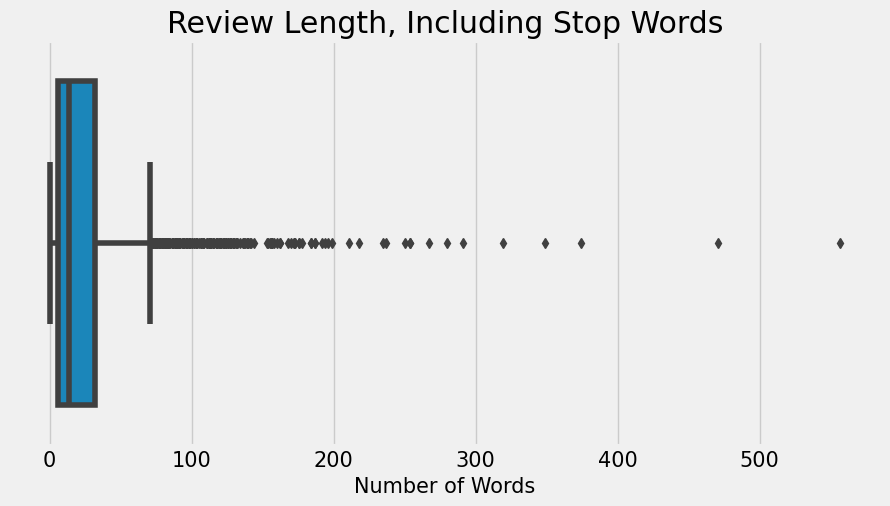

In [12]:
#plt.figure()
sns.boxplot(data = amazon_DF_1, x = "Review Length")
plt.xlabel('Number of Words')
plt.title('Review Length, Including Stop Words')

plt.show()

C:\Users\prath\AppData\Local\Temp\ipykernel_32076\2603510027.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amazon_DF_1["Review Length"], kde = False)


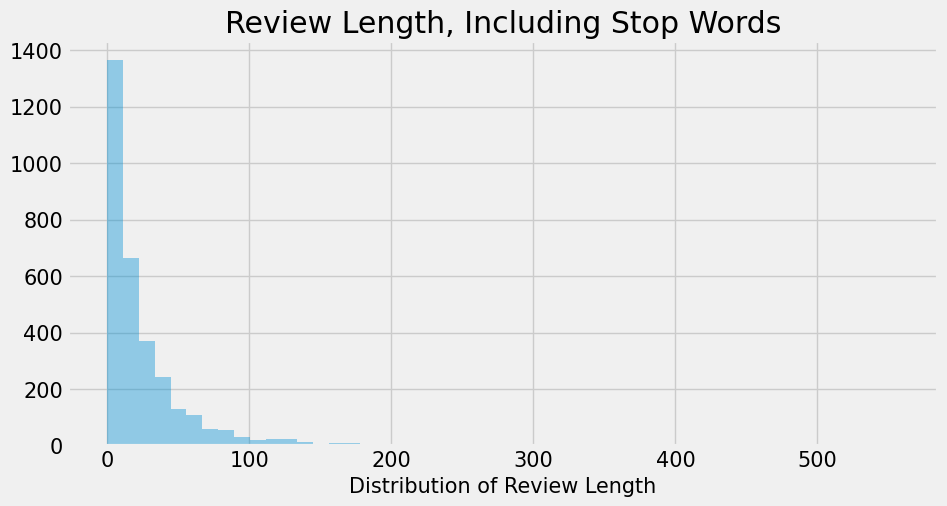

In [13]:
sns.distplot(amazon_DF_1["Review Length"], kde = False)
plt.xlabel('Distribution of Review Length')
plt.title('Review Length, Including Stop Words')

plt.show()

#### Since the mean is greater than the median, the distribution is positively skewed, as observed in the histogram above.

## REVIEWS WITH NO WORDS

In [14]:
amazon_DF_No_Words = amazon_DF_1[amazon_DF_1["Review Length"] == 0]
amazon_DF_No_Words.shape


(84, 6)

#### As observed, we can see that there are reviews that contain only emojis in them. Most of the reviews seem to be positive with the 👌 (OK symbol) and 👍 (Thumbs up) being the most frequent. If we exclude these reviews, we get the following statistics about the length of reviews for this product.

## REVIEWS WITH WORDS

In [15]:
amazon_DF_Words = amazon_DF_1[amazon_DF_1["Review Length"] > 0]
amazon_DF_Words["Review Length"].describe()

count    3066.000000
mean       26.627528
std        35.929715
min         1.000000
25%         6.000000
50%        15.000000
75%        33.000000
max       557.000000
Name: Review Length, dtype: float64

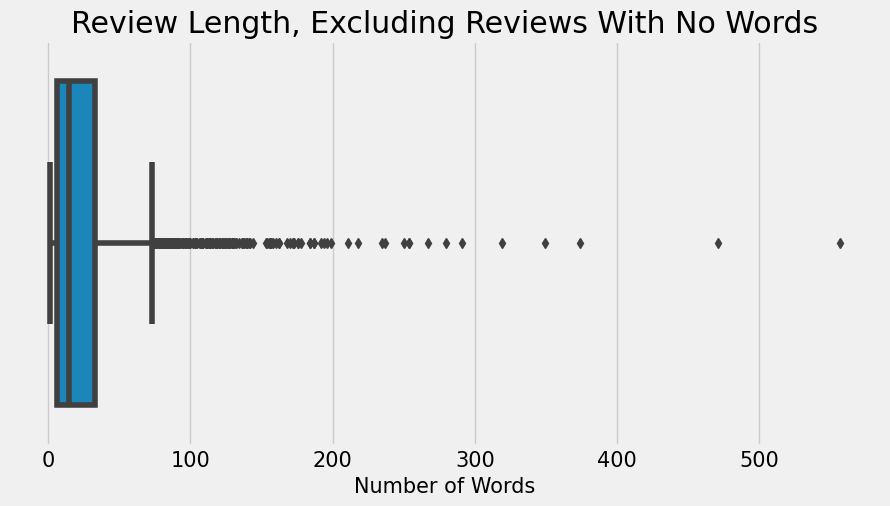

In [16]:
sns.boxplot(data = amazon_DF_Words, x = "Review Length")
plt.xlabel('Number of Words')
plt.title('Review Length, Excluding Reviews With No Words')

plt.show()

C:\Users\prath\AppData\Local\Temp\ipykernel_32076\3650604901.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amazon_DF_Words["Review Length"], kde = False)


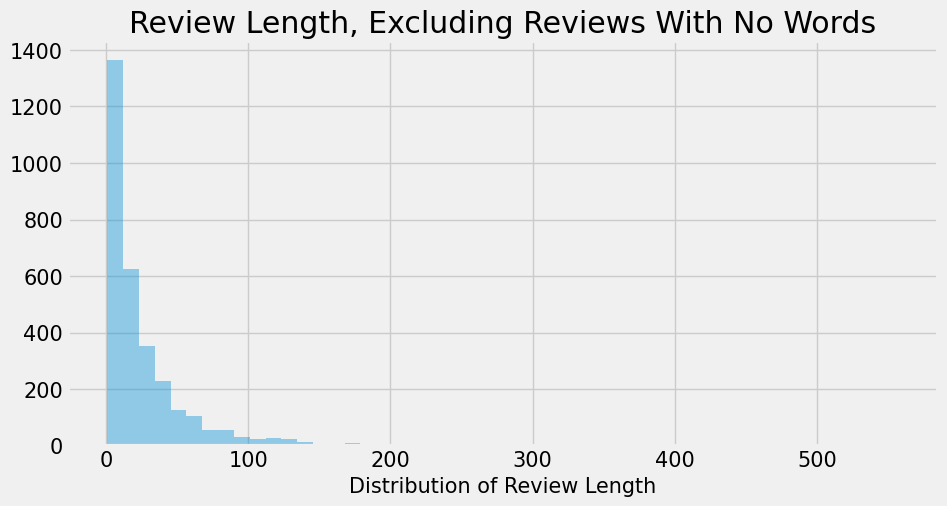

In [17]:
sns.distplot(amazon_DF_Words["Review Length"], kde = False)
plt.xlabel('Distribution of Review Length')
plt.title('Review Length, Excluding Reviews With No Words')

plt.show()

#### Since the mean is greater than the median, the distribution is positively skewed, as observed in the histogram above.

In [18]:
amazon_DF_One_Word = amazon_DF_Words[amazon_DF_Words['Review Length'] == 1]
amazon_DF_One_Word.sample(10)

,rating,date,variation,verified_reviews,feedback,Review Length
432,5,9-Jul-18,White,Thanks,1,1
417,5,13-Jul-18,Black,Thanks,1,1
1180,5,28-Jul-18,White Spot,Great!,1,1
2460,5,30-Jul-18,Black Dot,Great,1,1
1802,5,29-Jul-18,Black Plus,Great,1,1
2238,5,30-Jul-18,Configuration: Fire TV Stick,Good,1,1
2586,5,30-Jul-18,Black Dot,Nice,1,1
2235,5,30-Jul-18,Configuration: Fire TV Stick,Everything,1,1
3134,5,30-Jul-18,Black Dot,PHENOMENAL,1,1
1392,5,16-Jul-18,Black Spot,Perfect,1,1


#### There are 845 one-worded reviews for this product.

In [19]:
amazon_DF_One_Word["verified_reviews"] = amazon_DF_One_Word["verified_reviews"].apply(lambda x: x.lower())

C:\Users\prath\AppData\Local\Temp\ipykernel_32076\2251266891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_DF_One_Word["verified_reviews"] = amazon_DF_One_Word["verified_reviews"].apply(lambda x: x.lower())


In [20]:
amazon_DF_One_Word["verified_reviews"].unique()

array(['music', 'great', 'cool', 'entertainment', 'everything',
       'terrific', 'divertido', 'thanks', 'love', 'none', 'workreat',
       'amazing', 'a++++', 'amazing!', 'perfect', 'nice', 'great!', 'meh',
       'excellent', 'fun', 'ight', 'home', 'a+', 'awesome!', 'perfect!!!',
       'personal', 'love!', 'great!!', 'ok', 'good', 'like', 'awesome',
       'review', 'phenomenal', 'barry'], dtype=object)

In [21]:
amazon_DF_One_Word["verified_reviews"].value_counts().head()

great         11
cool           4
perfect        4
good           3
everything     3
Name: verified_reviews, dtype: int64

#### The word 'good' is the most frequent word used in one-worded reviews, which constitutes 47.22% of all single worded reviews.

# AVERAGE WORD LENGTH

In [22]:
# Check average word length
def word_len(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

amazon_DF_Words["Avg Word Length"] = amazon_DF_Words["verified_reviews"].apply(lambda x: word_len(x))
amazon_DF_Words.sample(7)

C:\Users\prath\AppData\Local\Temp\ipykernel_32076\1455688934.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_DF_Words["Avg Word Length"] = amazon_DF_Words["verified_reviews"].apply(lambda x: word_len(x))


,rating,date,variation,verified_reviews,feedback,Review Length,Avg Word Length
2096,5,29-Jun-18,Black Plus,We have a great time using this as a family. E...,1,43,3.466667
2136,5,31-Jul-18,Configuration: Fire TV Stick,We love the Fire TV Stick and will love it eve...,1,23,4.391304
716,5,30-Jul-18,Charcoal Fabric,"We love Alexa! We use her to play music, play ...",1,72,4.848485
3075,5,30-Jul-18,Black Dot,AMAZING. It has helped me become better organi...,1,23,5.347826
1907,5,26-Jul-18,Black Plus,Love all the cool thing I can do!,1,8,3.250000
377,5,26-Jul-18,Black,Fast shipping and works well,1,5,4.800000
1952,5,25-Jul-18,Black Plus,I love it and my family loves it also we use i...,1,33,3.545455


In [23]:
amazon_DF_Words['Avg Word Length'].describe()

count    3066.000000
mean        4.407624
std         1.439815
min         2.000000
25%         3.875000
50%         4.259669
75%         4.711864
max        65.000000
Name: Avg Word Length, dtype: float64

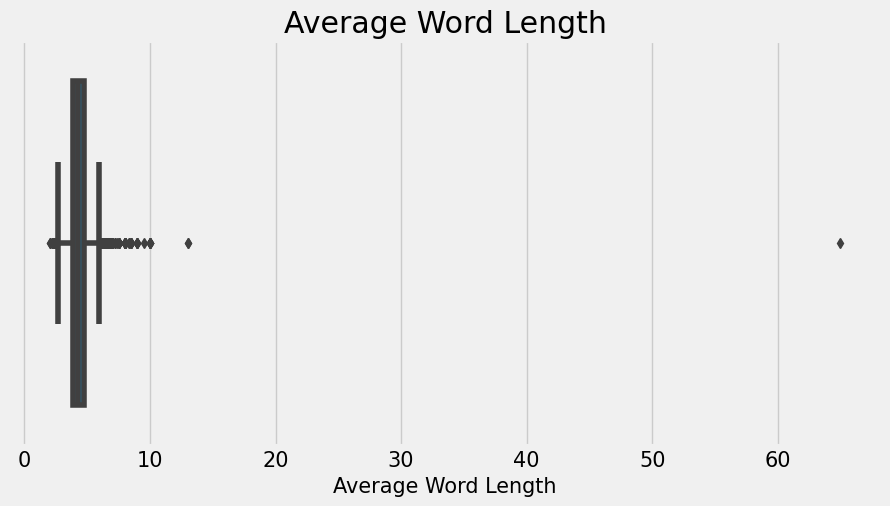

In [24]:
sns.boxplot(data = amazon_DF_Words, x = "Avg Word Length")
plt.xlabel('Average Word Length')
plt.title("Average Word Length")

plt.show()

#### The average word length is 4.81 letters while the median word length is 4.67 letters.

C:\Users\prath\AppData\Local\Temp\ipykernel_32076\3536071003.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amazon_DF_Words["Avg Word Length"], kde = False)


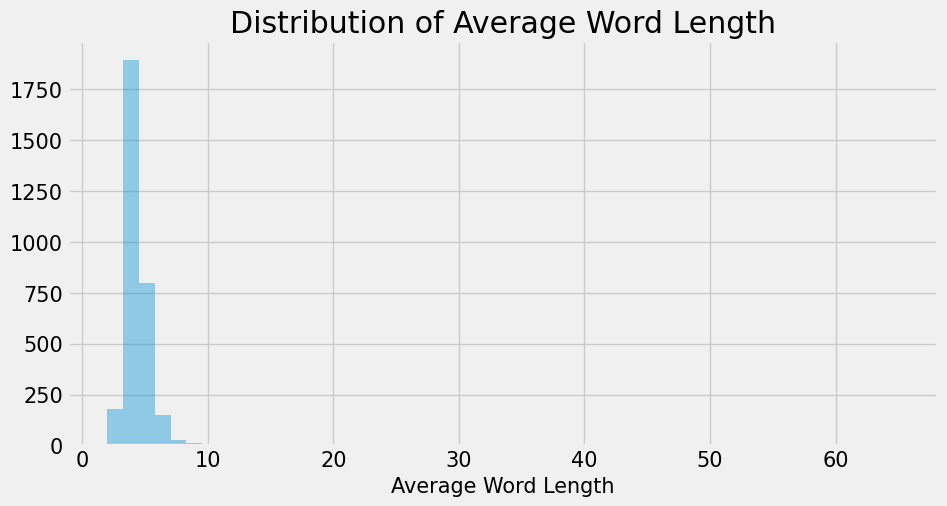

In [25]:
sns.distplot(amazon_DF_Words["Avg Word Length"], kde = False)
plt.xlabel('Average Word Length')
plt.title('Distribution of Average Word Length')

plt.show()

<a id = 'text-clean'></a>

# CLEANING THE TEXT

#### The text needs to be cleaned by removing punctuation, numbers, trailing spaces and extra white spaces.

In [26]:
amazon_DF_clean = amazon_DF.copy()
stop_words = stopwords.words("english")

In [27]:
def clean(s):
    s = s.lower()                   #Converting to lower case
    s = re.sub(r'[^\w\s]', ' ', s)  #Removing punctuation
    s = re.sub(r'[\d+]', ' ', s)    #Removing Numbers
    s = s.strip()                   #Removing trailing spaces
    s = re.sub(' +', ' ', s)        #Removing extra whitespaces
    return s

In [28]:
amazon_DF_clean["verified_reviews"] = amazon_DF_clean["verified_reviews"].apply(lambda x: clean(x))

In [29]:
amazon_DF_clean.sample(12)

,rating,date,variation,verified_reviews,feedback
353,5,30-Jul-18,Black,this one s going in the kitchen for timer musi...,1
2509,5,30-Jul-18,Black Dot,its was easy to set up,1
2011,5,20-Jul-18,Black Plus,love alexa makes it fun when people are around...,1
814,4,30-Jul-18,Sandstone Fabric,excellent product set up with ease as well,1
883,3,29-Jul-18,Charcoal Fabric,i don t think the nd gen sounds as good as the...,1
1918,1,26-Jul-18,Black Plus,i am so disappointed in this product i tried t...,0
3064,5,30-Jul-18,White Dot,super easy to hook up and program i use the mu...,1
2686,5,30-Jul-18,Black Dot,a great product for the price works well,1
713,5,30-Jul-18,Charcoal Fabric,we love the size of the nd generation echo sti...,1
2933,5,30-Jul-18,Black Dot,have the echo wanted something smaller in anot...,1


## STOP WORDS

#### Stop words include articles (a, an, the, etc.), prepositions (in, into, between, etc.), pronouns (who, where, he, she, etc.) and other words that have been programmed to ignore. Removing these words further shortens these sentences and helps improve the processing time.

In [30]:
# Removal of Stop Words
amazon_DF_clean["verified_reviews"] = amazon_DF_clean["verified_reviews"].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

In [31]:
amazon_DF_clean["verified_reviews"][15]

'love wife hates'

# WORDCLOUD

#### Word cloud is a visual representation of text data. The size of the word in the image is proportional to its importance, or in this case, its frequency.

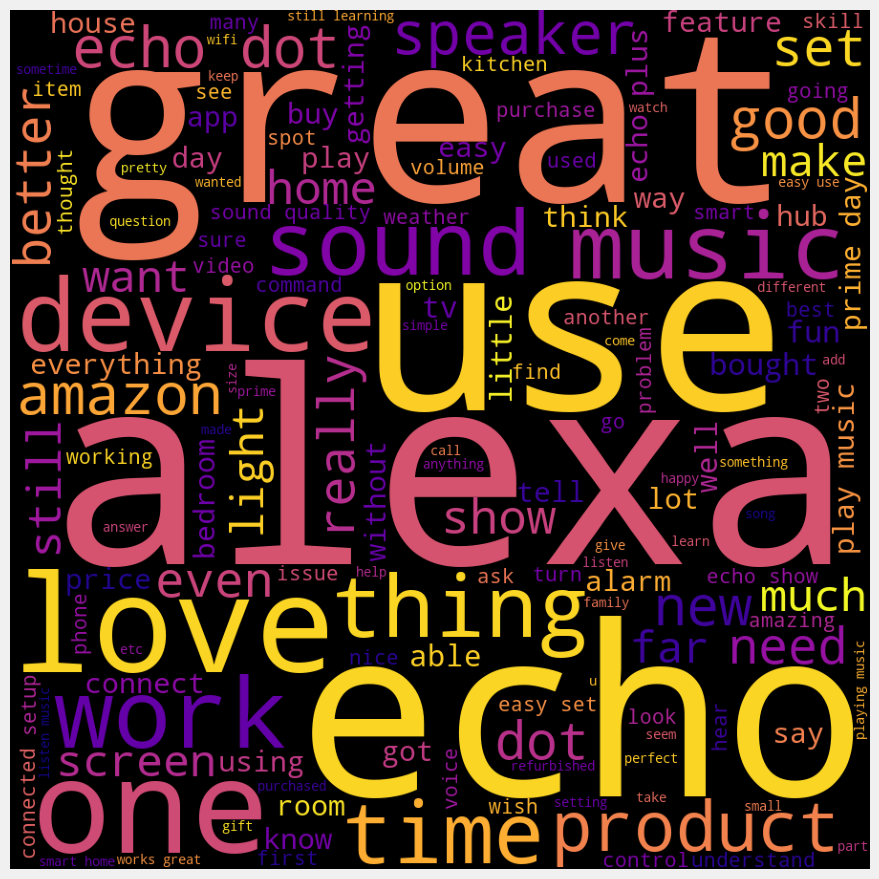

In [32]:
reviews = pd.Series(amazon_DF_clean["verified_reviews"].tolist()).astype(str)
plt.figure(figsize = (9, 9))
rev_wcloud_all = WordCloud(width = 900, height = 900, colormap = 'plasma', max_words = 150).generate(''.join(reviews))
plt.imshow(rev_wcloud_all)
plt.tight_layout(pad = 0.2)
plt.axis('off')

plt.show()

# TOKENIZATION

#### Tokenization is splitting a body of text into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

In [33]:
tokenizer = RegexpTokenizer(r'\w+')
amazon_DF_clean["Reviews_Token"] = amazon_DF_clean["verified_reviews"].apply(lambda x: tokenizer.tokenize(x))

In [34]:
amazon_DF_clean[["verified_reviews", "Reviews_Token"]].sample(10)

,verified_reviews,Reviews_Token
700,received echo gift needed another bluetooth so...,"[received, echo, gift, needed, another, blueto..."
2797,complaint sound quality great mostly use comma...,"[complaint, sound, quality, great, mostly, use..."
1178,nice,[nice]
493,works good however price went week purchased,"[works, good, however, price, went, week, purc..."
2925,love alexa love echo dot trouble speakers usin...,"[love, alexa, love, echo, dot, trouble, speake..."
835,week still learning alexa learning process lov...,"[week, still, learning, alexa, learning, proce..."
2574,love alexa love echo dot trouble speakers usin...,"[love, alexa, love, echo, dot, trouble, speake..."
929,like everything,"[like, everything]"
1902,used last weeks like children also like alexa ...,"[used, last, weeks, like, children, also, like..."
2602,love works great making home smarthome,"[love, works, great, making, home, smarthome]"


# LEMMATIZATION

#### Lemmatization extracts the root of the word. For example, from the word "driving', "drive" is extracted. Unlike stemming, lemmatization understands the context and provides the root words rather than simply removing the suffix or prefix of the word.

In [35]:
lemm = WordNetLemmatizer()

#### POS (Parts-of-speech) tagging is the task of labelling each word in a sentence with its appropriate part of speech. Parts of speech include nouns, verbs, adverbs, adjectives, etc.

In [36]:
# Conversion of NLTK POS tags to WordNet Tags

def to_wordnet(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemm_text(text):
    nltk_tagged = nltk.pos_tag(text)
    # Result = (text, pos_tag)
    wordnet_tagged = map(lambda x: (x[0], to_wordnet(x[1])), nltk_tagged)
    lemm_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemm_sentence.append(word)
        else:
            lemm_sentence.append(lemm.lemmatize(word, tag))
    return lemm_sentence

In [37]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\prath\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [38]:
amazon_DF_clean["Reviews_Lemm"] = amazon_DF_clean["Reviews_Token"].apply(lambda x: lemm_text(x))

In [39]:
amazon_DF_clean[["Reviews_Token", "Reviews_Lemm"]].sample(14)

,Reviews_Token,Reviews_Lemm
224,"[love, echo, great, sound, smart]","[love, echo, great, sound, smart]"
448,"[works, good]","[work, good]"
2496,"[son, loves, echo, dot]","[son, love, echo, dot]"
1276,"[love, little, dot, screen, super, easy, set, ...","[love, little, dot, screen, super, easy, set, ..."
1002,"[impressed, look, clarity, sound, color]","[impressed, look, clarity, sound, color]"
261,"[already, alexa, amazon, find, today, could, r...","[already, alexa, amazon, find, today, could, r..."
2093,"[love, echo, plus, mainly, worry, putting, cd,...","[love, echo, plus, mainly, worry, put, cd, pla..."
2937,[nice],[nice]
3088,"[dislike, volume, sound, loud, enough]","[dislike, volume, sound, loud, enough]"
2706,"[great, play, music, throughout, house, great,...","[great, play, music, throughout, house, great,..."


# MOST COMMON WORDS

In [40]:
review_list = list(itertools.chain.from_iterable(amazon_DF_clean['Reviews_Lemm']))
rev_word_freq = collections.Counter(review_list)

word_freq_DF = pd.DataFrame(rev_word_freq.most_common(15), columns=['Words', 'Count'])
word_freq_DF

,Words,Count
0,love,1058
1,echo,858
2,great,739
3,use,663
4,work,646
5,alexa,632
6,music,540
7,like,528
8,get,485
9,sound,427


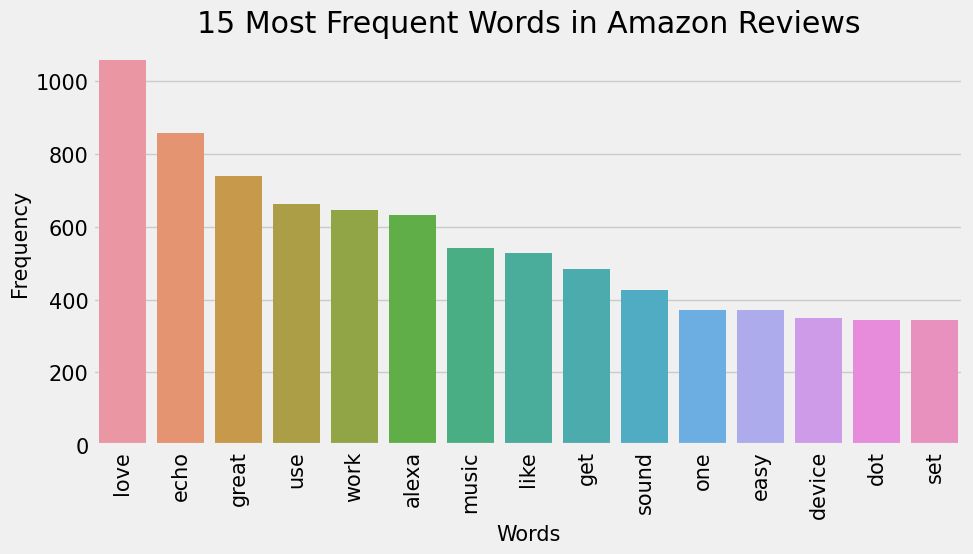

In [41]:
sns.barplot(data = word_freq_DF, x = "Words", y = "Count")
plt.ylabel("Frequency")
plt.xticks(rotation = 90)
plt.title("15 Most Frequent Words in Amazon Reviews")

plt.show()

<a id = 'sentiment'></a>

# SENTIMENT ANALYSIS

#### Sentiment analysis is the analysis of emotions from a text (usually classified into positive or negative). In this case, we can understand the customers' sentiments towards this product. In this case, 2 different packages for sentiment analysis will be used - TextBlob and VADER (Valence Aware Dictionary and sEntiment Reasoner). We will obtain and analyse the polarity scores from both methods and analyze them. Polarity scores range from -1 to +1, with the former displaying extremely negative sentiments and the latter being extremely positive.

In [42]:
amazon_DF_clean["Sentiment_TextBlob"] = amazon_DF_clean["verified_reviews"].apply(lambda x: TextBlob(x).sentiment[0])

In [43]:
amazon_DF_clean[["verified_reviews", "Sentiment_TextBlob"]].head(10)

,verified_reviews,Sentiment_TextBlob
0,love echo,0.500000
1,loved,0.700000
2,sometimes playing game answer question correct...,-0.133333
3,lot fun thing yr old learns dinosaurs control ...,0.350000
4,music,0.000000
5,received echo gift needed another bluetooth so...,0.294643
6,without cellphone cannot use many features ipa...,0.220000
7,think th one purchased working getting one eve...,0.200000
8,looks great,0.800000
9,love listened songs heard since childhood get ...,0.650000


In [44]:
amazon_DF_clean["verified_reviews"][3]

'lot fun thing yr old learns dinosaurs control lights play games like categories nice sound playing music well'

In [45]:
senti = SentimentIntensityAnalyzer()
amazon_DF_clean["Sentiment_VADER"] = amazon_DF_clean["verified_reviews"].apply(lambda x: senti.polarity_scores(x)['compound'])

In [46]:
amazon_DF_clean[["verified_reviews", "Sentiment_VADER", "Sentiment_TextBlob"]].sample(15)

,verified_reviews,Sentiment_VADER,Sentiment_TextBlob
2173,great interface enjoy voice remote,0.8074,0.366667
1437,works exactly would expect right box love able...,0.9771,0.475974
2594,think really much play music answer stupid que...,0.1970,-0.033333
2184,watch amazon prime shows talk alexus,0.1779,0.000000
320,sound quality good wish alexa could answer que...,0.6808,0.550000
1527,perfect able see canary cameras exactly wanted...,0.9100,0.558333
1822,works perfect,0.5719,1.000000
2153,great buy recommend getting kodi movie addons,0.7650,0.800000
2118,great product would buy another,0.6249,0.800000
1479,great kitchen love cook fun look recipes also ...,0.9674,0.400000


In [47]:
amazon_DF_clean[["verified_reviews", "Sentiment_VADER"]][amazon_DF_clean["Sentiment_VADER"] < -0.5]

,verified_reviews,Sentiment_VADER
146,alexa since beginning accidentally spilled wat...,-0.5867
176,sad joke worthless,-0.5859
386,speakers arent loud alexa great though besides...,-0.5096
418,wanted use radio intercom get terrible fm rece...,-0.8591
504,something wrong first one even rep spoke could...,-0.7003
601,bad bad speaker sound,-0.7906
660,set echo dot worked hour died completely buy r...,-0.5574
661,echo dot horrible volume phone louder device b...,-0.5423
676,never satisfied product perfect introduction a...,-0.6520
681,seems trouble hearing say wake word despite tr...,-0.6597


C:\Users\prath\AppData\Local\Temp\ipykernel_32076\2943079187.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amazon_DF_clean["Sentiment_VADER"], kde = False, label = "VADER")
C:\Users\prath\AppData\Local\Temp\ipykernel_32076\2943079187.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amaz

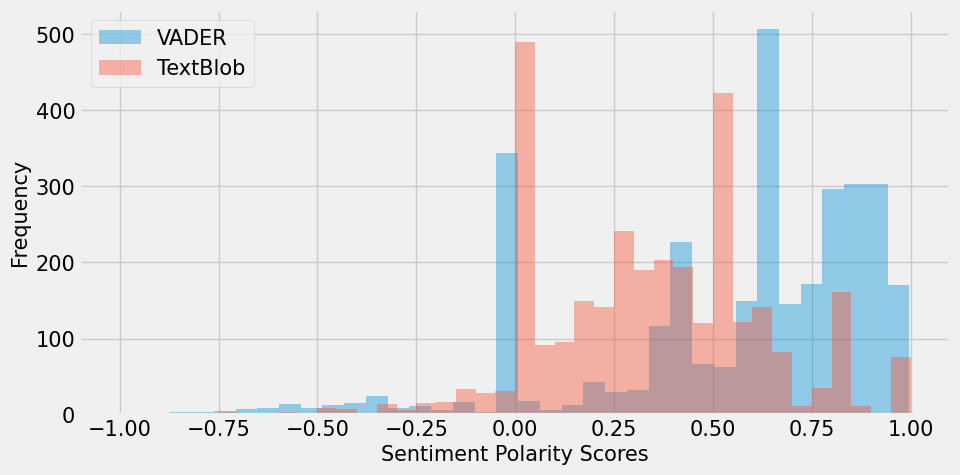

In [48]:
sns.distplot(amazon_DF_clean["Sentiment_VADER"], kde = False, label = "VADER")
sns.distplot(amazon_DF_clean["Sentiment_TextBlob"], kde = False, label = "TextBlob")
plt.xlabel("Sentiment Polarity Scores")
plt.ylabel("Frequency")
plt.legend()

plt.show()

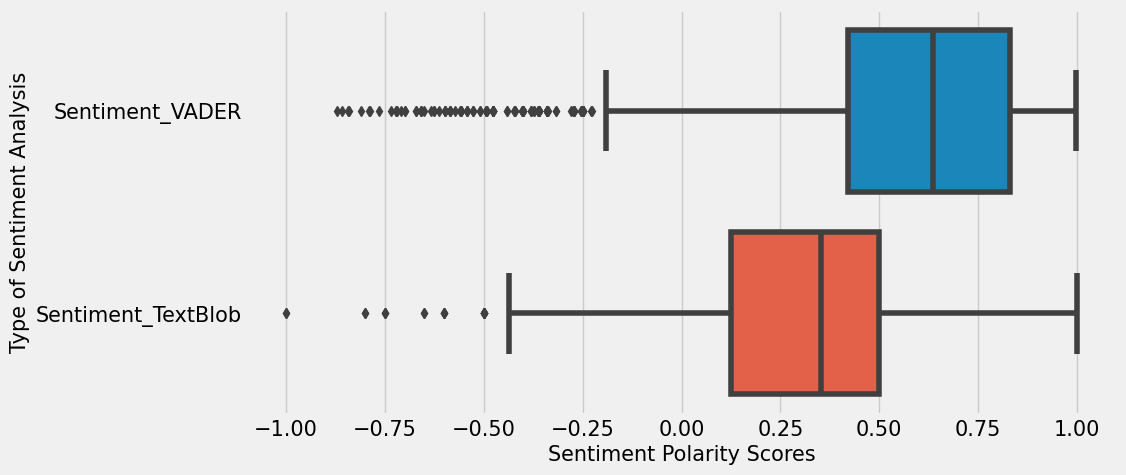

In [49]:
sns.boxplot(data = pd.melt(amazon_DF_clean[["Sentiment_VADER", "Sentiment_TextBlob"]]), x = "value", y = "variable")
plt.xlabel("Sentiment Polarity Scores")
plt.ylabel("Type of Sentiment Analysis")

plt.show()

## MOST POSITIVE REVIEWS - TEXTBLOB

In [50]:
DF_Pos_TB = amazon_DF_clean[["verified_reviews","Reviews_Lemm","Sentiment_TextBlob"]][amazon_DF_clean["Sentiment_TextBlob"] == amazon_DF_clean["Sentiment_TextBlob"].max()]

In [51]:
DF_Pos_TB

,verified_reviews,Reviews_Lemm,Sentiment_TextBlob
34,device awesome,"[device, awesome]",1.0
75,awesome,[awesome],1.0
119,excellent product set ease well,"[excellent, product, set, ease, well]",1.0
152,awesome understands kids,"[awesome, understands, kid]",1.0
173,best father day gift dad joked mom alexa one l...,"[best, father, day, gift, dad, joked, mom, ale...",1.0
...,...,...,...
2902,excellent bought another one yesterday,"[excellent, buy, another, one, yesterday]",1.0
2941,impressed,[impressed],1.0
3038,perfect home office,"[perfect, home, office]",1.0
3143,awesome device wish bought one ages ago,"[awesome, device, wish, buy, one, age, ago]",1.0


#### There are 255 reviews that are extremely positive, according to TextBlob.

## WORDCLOUD OF THE MOST POSITIVE REVIEWS - TEXTBLOB

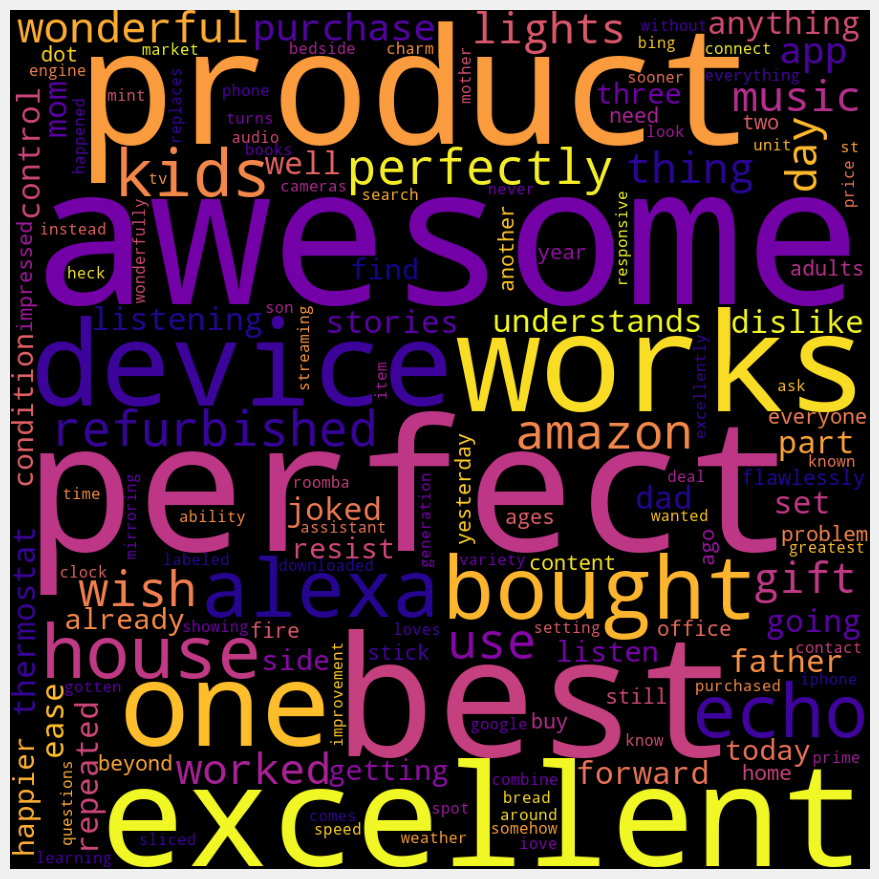

In [52]:
# Word Cloud from the most postive reviews from TextBlob

plt.figure(figsize = (9, 9))
wcloud_Pos_TB = WordCloud(width = 900, height = 900, colormap = 'plasma', max_words = 150).generate(' '.join(pd.Series(DF_Pos_TB["verified_reviews"].tolist()).astype(str)))
plt.imshow(wcloud_Pos_TB)
plt.tight_layout(pad = 0.2)
plt.axis('off')

plt.show()

## MOST POSTIVE REVIEWS - VADER

In [53]:
amazon_DF_clean[["verified_reviews","Reviews_Lemm","Sentiment_VADER"]][amazon_DF_clean["Sentiment_VADER"] == amazon_DF_clean["Sentiment_VADER"].max()]

,verified_reviews,Reviews_Lemm,Sentiment_VADER
1322,got prime day figured see hype honestly really...,"[get, prime, day, figure, see, hype, honestly,...",0.997


In [54]:
list(amazon_DF_clean["verified_reviews"][amazon_DF_clean["Sentiment_VADER"] == amazon_DF_clean["Sentiment_VADER"].max()])

['got prime day figured see hype honestly really want like personally bugging house seems kinda weird honestly love like way world going loved much ordered get show looks like came downright ugly interest watching anything devices anyway spot screen bother although clear alexa hear pretty much everywhere favorite part living room hooked bluetooth soundbar say play song want guess could pick smartphone know much easier interact media using voice rather navigating multiple pages one thing fan home screen cards really rotate much also rotate playing music love display weather listen music screen clear also really enjoy alexa able tell commute great skill download tell traffic different places program name say alexa give traffic parents tell best route time arrive current traffic programmed parents fiances parents work work really works great one thing actually preferred dot spot dot light different colors package notifications seen spot really much package notifications yet dot easy tell 

#### According to the VADER Sentiment Analyzer, the most positive review has a polarity score of 0.9932 and no reviews have been able to achieve the perfect positive polarity score of +1, unlike TextBlob. So, instead of filtering the highest score, let's filter reviews that polarity scores greater than 0.8. 

In [55]:
DF_Pos_VADER = amazon_DF_clean[["verified_reviews","Reviews_Lemm","Sentiment_VADER"]][amazon_DF_clean["Sentiment_VADER"] > 0.8]

In [56]:
DF_Pos_VADER

,verified_reviews,Reviews_Lemm,Sentiment_VADER
3,lot fun thing yr old learns dinosaurs control ...,"[lot, fun, thing, yr, old, learn, dinosaur, co...",0.9169
5,received echo gift needed another bluetooth so...,"[receive, echo, gift, need, another, bluetooth...",0.8555
9,love listened songs heard since childhood get ...,"[love, listen, song, hear, since, childhood, g...",0.8519
11,love learning knew things eveyday still figuri...,"[love, learn, knew, thing, eveyday, still, fig...",0.8934
13,love love love,"[love, love, love]",0.9274
...,...,...,...
3128,outstanding product easy use works great,"[outstanding, product, easy, use, work, great]",0.9001
3129,six throughout home great times music talking ...,"[six, throughout, home, great, time, music, ta...",0.8221
3142,three year old loves good basic household task...,"[three, year, old, love, good, basic, househol...",0.8519
3147,love things running entire home tv lights ther...,"[love, thing, run, entire, home, tv, light, th...",0.9648


## WORDCLOUD OF THE MOST POSTIVE REVIEWS - VADER

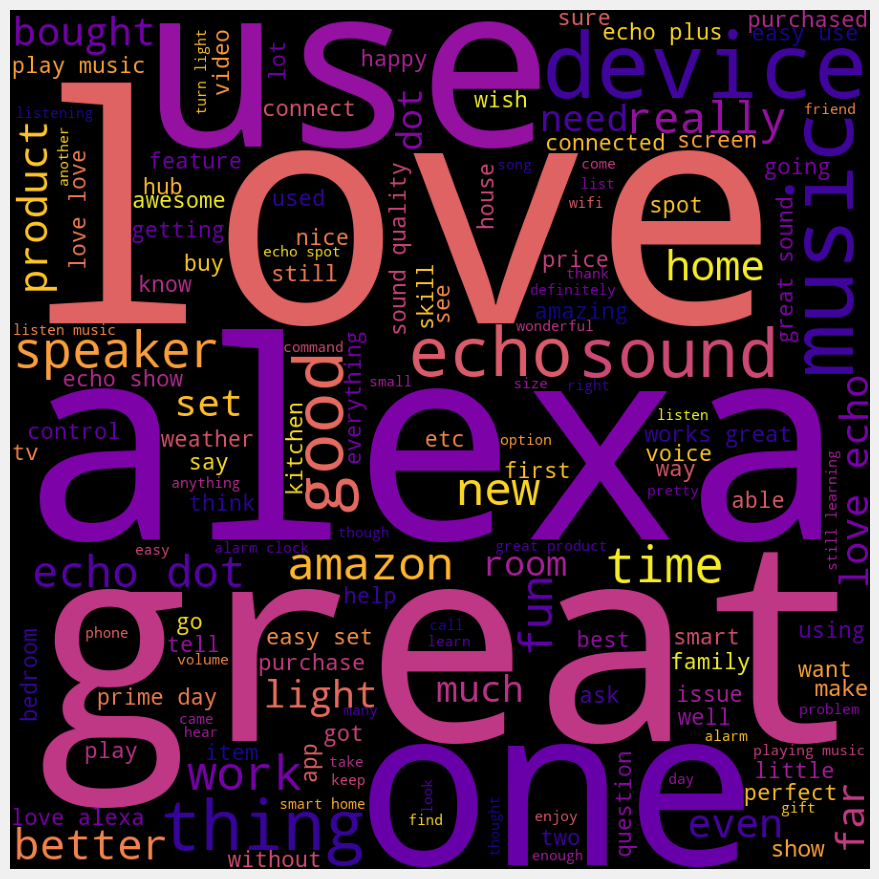

In [57]:
# Word Cloud from the most postive reviews from VADER

plt.figure(figsize = (9, 9))
wcloud_Pos_VADER = WordCloud(width = 900, height = 900, colormap = 'plasma', max_words = 150).generate(' '.join(pd.Series(DF_Pos_VADER["verified_reviews"].tolist()).astype(str)))
plt.imshow(wcloud_Pos_VADER)
plt.tight_layout(pad = 0.2)
plt.axis('off')

plt.show()

## MOST NEGATIVE REVIEWS - TEXTBLOB

In [58]:
amazon_DF_clean[["verified_reviews","Reviews_Lemm","Sentiment_TextBlob"]][amazon_DF_clean["Sentiment_TextBlob"] == amazon_DF_clean["Sentiment_TextBlob"].min()]

,verified_reviews,Reviews_Lemm,Sentiment_TextBlob
661,echo dot horrible volume phone louder device b...,"[echo, dot, horrible, volume, phone, louder, d...",-1.0
1903,terrible stopped working one day,"[terrible, stop, work, one, day]",-1.0


#### There are 61 reviews that have the lowest polarity score of -1 using TextBlob, which indicate that these reviews are highly negative. Let's filter reviews with scores less than -0.7 to get more insights.

In [59]:
DF_Neg_TB = amazon_DF_clean[["verified_reviews","Reviews_Lemm","Sentiment_TextBlob"]][amazon_DF_clean["Sentiment_TextBlob"] < -0.7]

In [60]:
DF_Neg_TB

,verified_reviews,Reviews_Lemm,Sentiment_TextBlob
109,outlet work disappointed,"[outlet, work, disappoint]",-0.75
661,echo dot horrible volume phone louder device b...,"[echo, dot, horrible, volume, phone, louder, d...",-1.00
804,outlet work disappointed,"[outlet, work, disappoint]",-0.75
1307,would stars could turn things try screen read ...,"[would, star, could, turn, thing, try, screen,...",-0.80
1386,invasive scared crap speaking spoken creapy af,"[invasive, scar, crap, speak, spoken, creapy, af]",-0.80
1487,disappointed alexa hear respond requests,"[disappointed, alexa, hear, respond, request]",-0.75
1903,terrible stopped working one day,"[terrible, stop, work, one, day]",-1.00


## WORDCLOUD OF THE MOST NEGATIVE REVIEWS - TEXTBLOB

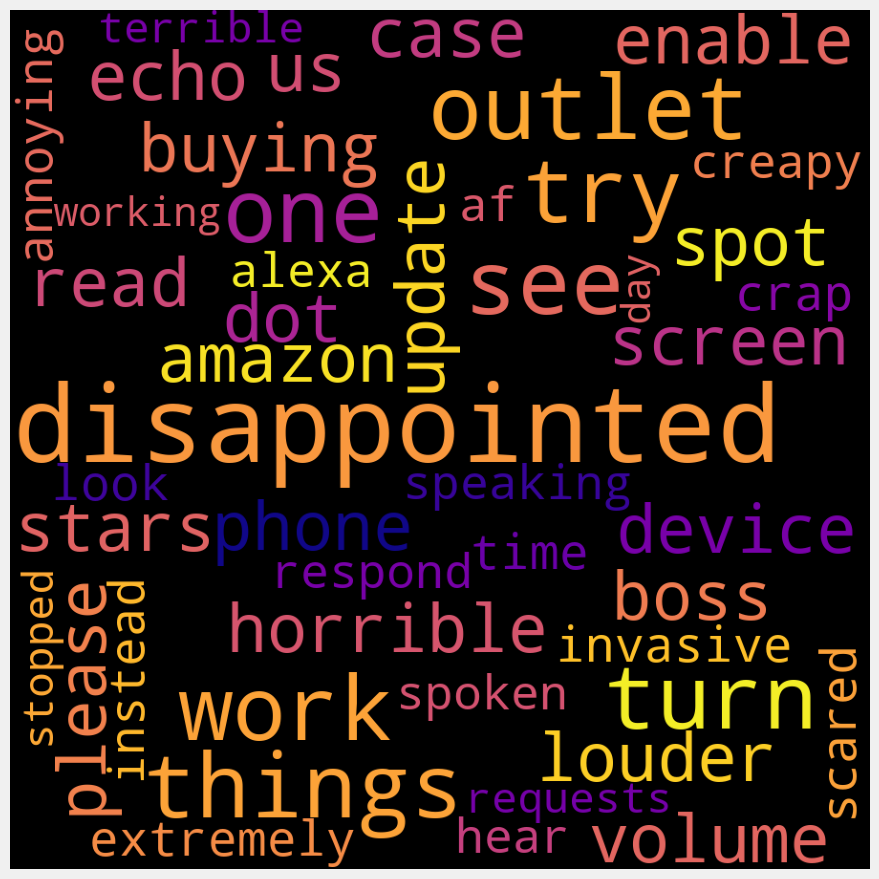

In [61]:
# Word Cloud of the most negative reviews from TextBlob

plt.figure(figsize = (9, 9))
wcloud_Neg_TB = WordCloud(width = 900, height = 900, colormap = 'plasma', max_words = 150).generate(' '.join(pd.Series(DF_Neg_TB["verified_reviews"].tolist()).astype(str)))
plt.imshow(wcloud_Neg_TB)
plt.tight_layout(pad = 0.2)
plt.axis('off')

plt.show()

## MOST NEGATIVE REVIEWS - VADER

In [62]:
amazon_DF_clean[["verified_reviews","Reviews_Lemm","Sentiment_VADER"]][amazon_DF_clean["Sentiment_VADER"] == amazon_DF_clean["Sentiment_VADER"].min()]

,verified_reviews,Reviews_Lemm,Sentiment_VADER
1383,echo devices house currently deployed bedside ...,"[echo, device, house, currently, deploy, bedsi...",-0.872


#### The most negative review, according to VADER, has a polarity score of -0.9616. Let's filter negative reviews that polarity scores less than -0.7.

In [63]:
DF_Neg_VADER = amazon_DF_clean[["verified_reviews","Reviews_Lemm","Sentiment_VADER"]][amazon_DF_clean["Sentiment_VADER"] < -0.7]

In [64]:
DF_Neg_VADER

,verified_reviews,Reviews_Lemm,Sentiment_VADER
418,wanted use radio intercom get terrible fm rece...,"[want, use, radio, intercom, get, terrible, fm...",-0.8591
504,something wrong first one even rep spoke could...,"[something, wrong, first, one, even, rep, spok...",-0.7003
601,bad bad speaker sound,"[bad, bad, speaker, sound]",-0.7906
1252,product complete waste money ask alexa questio...,"[product, complete, waste, money, ask, alexa, ...",-0.7096
1329,bought replace dot bedroom already show couple...,"[buy, replace, dot, bedroom, already, show, co...",-0.7876
1383,echo devices house currently deployed bedside ...,"[echo, device, house, currently, deploy, bedsi...",-0.8720
1422,waste money echo generation really get anythin...,"[waste, money, echo, generation, really, get, ...",-0.8106
1448,waste money echo gen echo gen dot far better j...,"[waste, money, echo, gen, echo, gen, dot, far,...",-0.8424
1881,although second echo device still disappointed...,"[although, second, echo, device, still, disapp...",-0.7351
1979,use apple music worthless without sound qualit...,"[use, apple, music, worthless, without, sound,...",-0.7184


#### There are 119 reviews that have polarity scores less than 0.7.

## WORDCLOUD OF MOST NEGATIVE REVIEWS - VADER

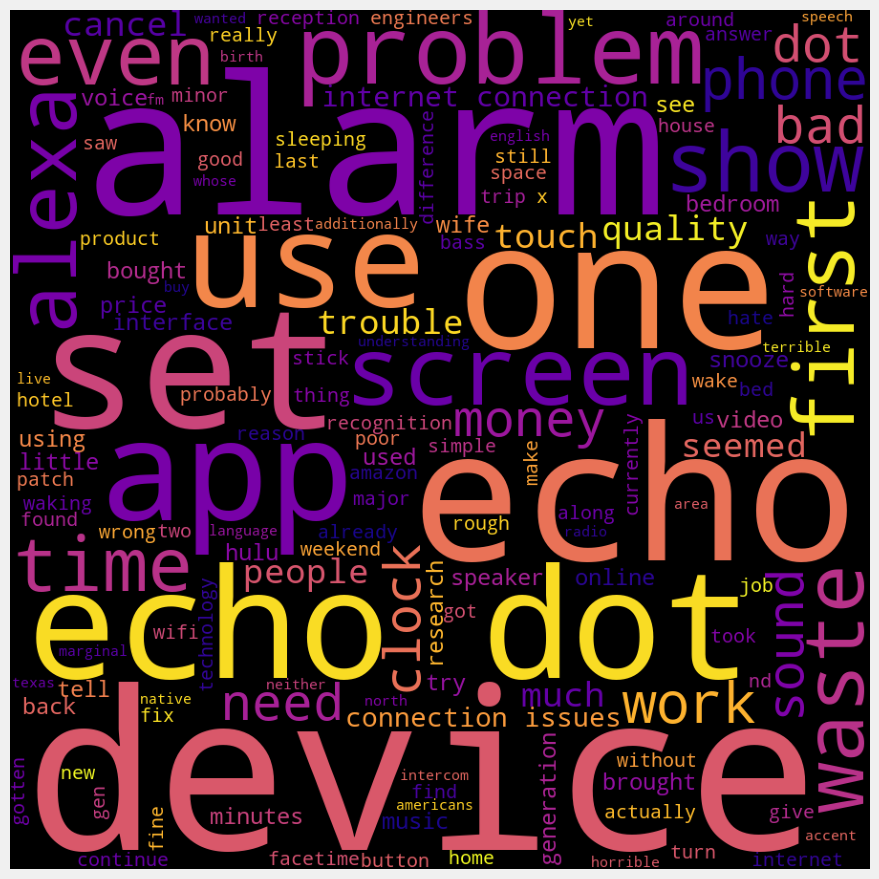

In [65]:
plt.figure(figsize = (9, 9))
wcloud_Neg_VADER = WordCloud(width = 900, height = 900, colormap = 'plasma', max_words = 150).generate(' '.join(pd.Series(DF_Neg_VADER["verified_reviews"].tolist()).astype(str)))
plt.imshow(wcloud_Neg_VADER)
plt.tight_layout(pad = 0.2)
plt.axis('off')

plt.show()

In [66]:
amazon_DF_clean[["Sentiment_TextBlob", "Sentiment_VADER"]].describe()

,Sentiment_TextBlob,Sentiment_VADER
count,3150.000000,3150.000000
mean,0.339744,0.554429
std,0.283912,0.358239
min,-1.000000,-0.872000
25%,0.124911,0.421500
50%,0.353333,0.636900
75%,0.500000,0.831600
max,1.000000,0.997000


In [67]:
def sentiment_result(polarity):
    if polarity >= 0.1:
        return "Postive"
    elif polarity <= -0.1:
        return "Negative"
    else:
        return "Neutral"

In [68]:
amazon_DF_clean["Label"] = amazon_DF_clean["Sentiment_VADER"].apply(lambda x: sentiment_result(x))

In [69]:
amazon_DF_clean["Label"].value_counts()

Postive     2636
Neutral      370
Negative     144
Name: Label, dtype: int64

<a id = 'bigrams'></a>

# BI-GRAMS

#### Bi-grams are sequences of pairs of words that are frequently mentioned together.

In [70]:
amazon_DF_clean["Bigrams"] = amazon_DF_clean["Reviews_Lemm"].apply(lambda x: list(ngrams(x, 2)))

In [71]:
amazon_DF_clean

,rating,date,variation,verified_reviews,feedback,Reviews_Token,Reviews_Lemm,Sentiment_TextBlob,Sentiment_VADER,Label,Bigrams
0,5,31-Jul-18,Charcoal Fabric,love echo,1,"[love, echo]","[love, echo]",0.500000,0.6369,Postive,"[(love, echo)]"
1,5,31-Jul-18,Charcoal Fabric,loved,1,[loved],[love],0.700000,0.5994,Postive,[]
2,4,31-Jul-18,Walnut Finish,sometimes playing game answer question correct...,1,"[sometimes, playing, game, answer, question, c...","[sometimes, play, game, answer, question, corr...",-0.133333,0.0516,Neutral,"[(sometimes, play), (play, game), (game, answe..."
3,5,31-Jul-18,Charcoal Fabric,lot fun thing yr old learns dinosaurs control ...,1,"[lot, fun, thing, yr, old, learns, dinosaurs, ...","[lot, fun, thing, yr, old, learn, dinosaur, co...",0.350000,0.9169,Postive,"[(lot, fun), (fun, thing), (thing, yr), (yr, o..."
4,5,31-Jul-18,Charcoal Fabric,music,1,[music],[music],0.000000,0.0000,Neutral,[]
...,...,...,...,...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,perfect kids adults everyone,1,"[perfect, kids, adults, everyone]","[perfect, kid, adult, everyone]",1.000000,0.5719,Postive,"[(perfect, kid), (kid, adult), (adult, everyone)]"
3146,5,30-Jul-18,Black Dot,listening music searching locations checking t...,1,"[listening, music, searching, locations, check...","[listen, music, search, location, check, time,...",0.250000,0.0000,Neutral,"[(listen, music), (music, search), (search, lo..."
3147,5,30-Jul-18,Black Dot,love things running entire home tv lights ther...,1,"[love, things, running, entire, home, tv, ligh...","[love, thing, run, entire, home, tv, light, th...",0.237662,0.9648,Postive,"[(love, thing), (thing, run), (run, entire), (..."
3148,5,30-Jul-18,White Dot,complaint sound quality great mostly use comma...,1,"[complaint, sound, quality, great, mostly, use...","[complaint, sound, quality, great, mostly, use...",0.356250,0.8957,Postive,"[(complaint, sound), (sound, quality), (qualit..."


In [72]:
bigrams_list = list(itertools.chain.from_iterable(amazon_DF_clean['Bigrams']))
bigrams_freq = collections.Counter(bigrams_list)

bigrams_freq_DF = pd.DataFrame(bigrams_freq.most_common(20), columns=['Bigrams', 'Count'])
bigrams_freq_DF

,Bigrams,Count
0,"(echo, dot)",198
1,"(work, great)",166
2,"(easy, set)",136
3,"(play, music)",133
4,"(love, echo)",116
5,"(sound, quality)",96
6,"(prime, day)",92
7,"(easy, use)",88
8,"(echo, plus)",85
9,"(great, product)",84


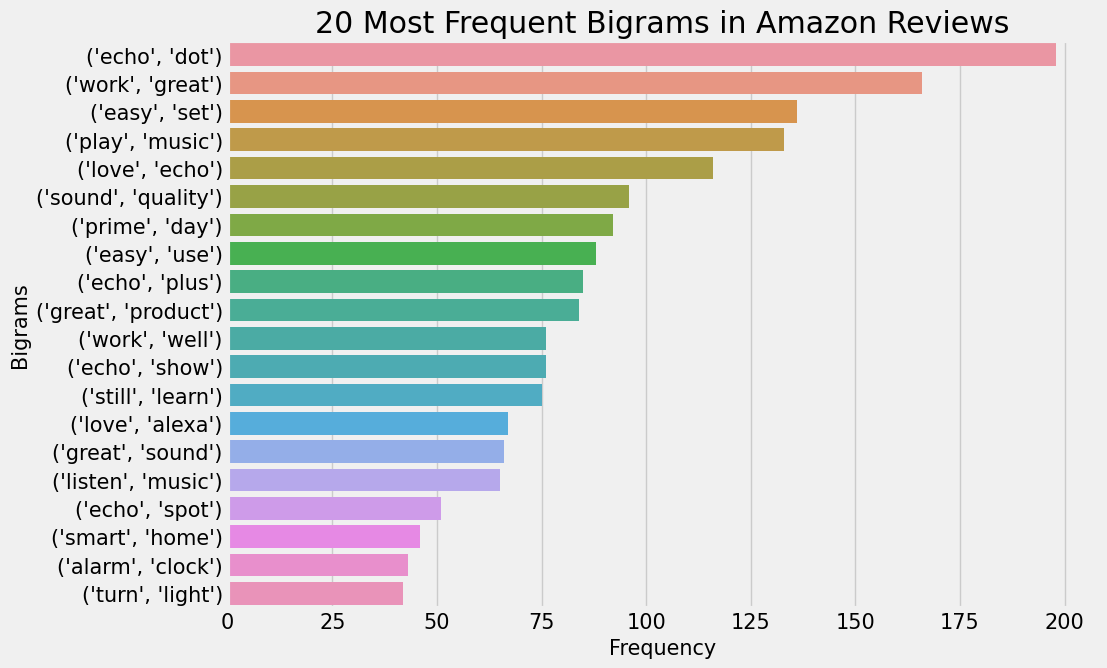

In [73]:
plt.figure(figsize = (10,7))
sns.barplot(data = bigrams_freq_DF, x = "Count", y = "Bigrams")
plt.xlabel("Frequency")
plt.ylabel("Bigrams")
plt.title("20 Most Frequent Bigrams in Amazon Reviews")

plt.show()

<a id = 'trigrams'></a>

# TRI-GRAMS

#### Tri-grams are similar to bi-grams. However, tri-grams are sequences of 3 words that frequently occur together, instead of 2.

In [74]:
amazon_DF_clean["Trigrams"] = amazon_DF_clean["Reviews_Lemm"].apply(lambda x: list(ngrams(x, 3)))

In [75]:
amazon_DF_clean

,rating,date,variation,verified_reviews,feedback,Reviews_Token,Reviews_Lemm,Sentiment_TextBlob,Sentiment_VADER,Label,Bigrams,Trigrams
0,5,31-Jul-18,Charcoal Fabric,love echo,1,"[love, echo]","[love, echo]",0.500000,0.6369,Postive,"[(love, echo)]",[]
1,5,31-Jul-18,Charcoal Fabric,loved,1,[loved],[love],0.700000,0.5994,Postive,[],[]
2,4,31-Jul-18,Walnut Finish,sometimes playing game answer question correct...,1,"[sometimes, playing, game, answer, question, c...","[sometimes, play, game, answer, question, corr...",-0.133333,0.0516,Neutral,"[(sometimes, play), (play, game), (game, answe...","[(sometimes, play, game), (play, game, answer)..."
3,5,31-Jul-18,Charcoal Fabric,lot fun thing yr old learns dinosaurs control ...,1,"[lot, fun, thing, yr, old, learns, dinosaurs, ...","[lot, fun, thing, yr, old, learn, dinosaur, co...",0.350000,0.9169,Postive,"[(lot, fun), (fun, thing), (thing, yr), (yr, o...","[(lot, fun, thing), (fun, thing, yr), (thing, ..."
4,5,31-Jul-18,Charcoal Fabric,music,1,[music],[music],0.000000,0.0000,Neutral,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,perfect kids adults everyone,1,"[perfect, kids, adults, everyone]","[perfect, kid, adult, everyone]",1.000000,0.5719,Postive,"[(perfect, kid), (kid, adult), (adult, everyone)]","[(perfect, kid, adult), (kid, adult, everyone)]"
3146,5,30-Jul-18,Black Dot,listening music searching locations checking t...,1,"[listening, music, searching, locations, check...","[listen, music, search, location, check, time,...",0.250000,0.0000,Neutral,"[(listen, music), (music, search), (search, lo...","[(listen, music, search), (music, search, loca..."
3147,5,30-Jul-18,Black Dot,love things running entire home tv lights ther...,1,"[love, things, running, entire, home, tv, ligh...","[love, thing, run, entire, home, tv, light, th...",0.237662,0.9648,Postive,"[(love, thing), (thing, run), (run, entire), (...","[(love, thing, run), (thing, run, entire), (ru..."
3148,5,30-Jul-18,White Dot,complaint sound quality great mostly use comma...,1,"[complaint, sound, quality, great, mostly, use...","[complaint, sound, quality, great, mostly, use...",0.356250,0.8957,Postive,"[(complaint, sound), (sound, quality), (qualit...","[(complaint, sound, quality), (sound, quality,..."


In [76]:
trigrams_list = list(itertools.chain.from_iterable(amazon_DF_clean["Trigrams"]))
trigrams_freq = collections.Counter(trigrams_list)

trigrams_freq_DF = pd.DataFrame(trigrams_freq.most_common(20), columns=['Trigrams', 'Count'])
trigrams_freq_DF

,Trigrams,Count
0,"(love, echo, dot)",23
1,"(easy, set, use)",20
2,"(love, echo, show)",19
3,"(love, love, love)",15
4,"(still, learn, use)",15
5,"(full, size, echo)",13
6,"(great, sound, quality)",13
7,"(love, echo, spot)",13
8,"(love, new, echo)",12
9,"(love, echo, plus)",12


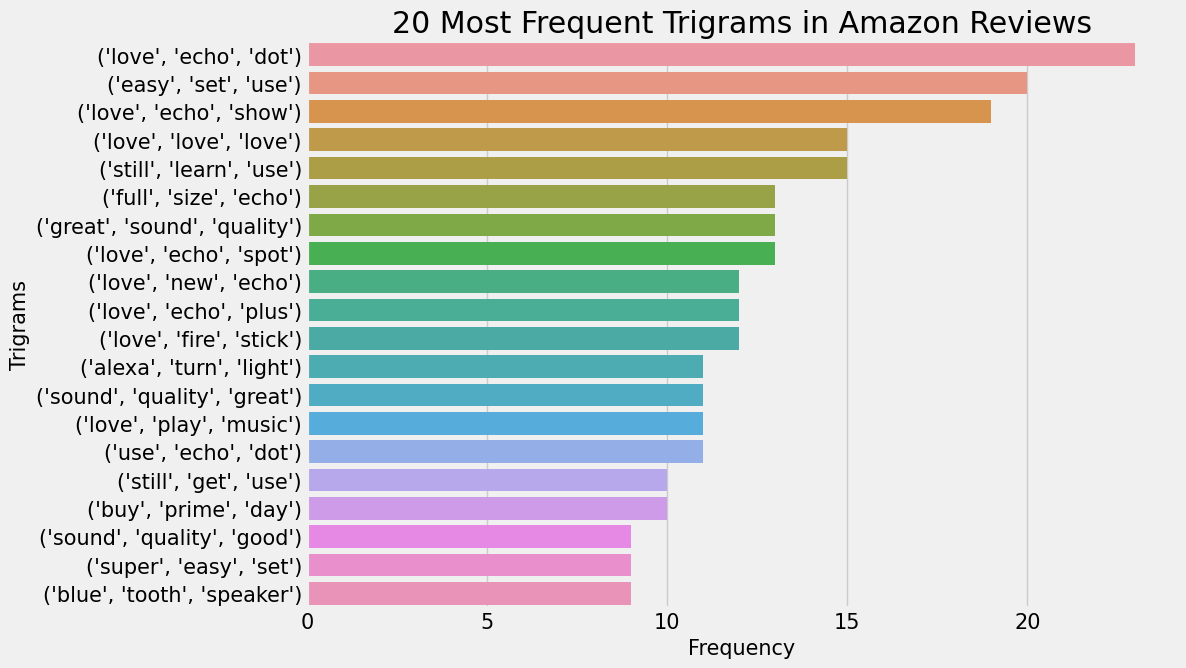

In [77]:
plt.figure(figsize = (10,7))
sns.barplot(data = trigrams_freq_DF, x = "Count", y = "Trigrams")
plt.xlabel("Frequency")
plt.ylabel("Trigrams")
plt.title("20 Most Frequent Trigrams in Amazon Reviews")

plt.show()

<a id = 'model'></a>

# MODEL BUILDING
#### These are the models that have been used (click on link to jump to section):
* #### [Random Forest](#rf)
* #### [Multinomial Naive Bayes](#mnb)
* #### [Support Vector Classifier](#svc)
* #### [Logistic Regression](#log)
* #### [SGD Classifier](#sgd)
* #### [XGBoost](#xgb)
* #### [AdaBoost](#ada)
* #### [KNN Classifier](#knn)

In [78]:
from sklearn import model_selection, preprocessing, svm, metrics
from sklearn.metrics import recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier, LogisticRegressionCV, Perceptron, PassiveAggressiveClassifier, RidgeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.utils import class_weight
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# !pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler, SMOTE
import xgboost as xgb

In [79]:
amazon_DF_clean["Label"].value_counts()

Postive     2636
Neutral      370
Negative     144
Name: Label, dtype: int64

#### There is a data imbalance, since only 14.6% of the reviews are negative and 12% of the reviews are neutral.

In [80]:
count_vect = CountVectorizer(max_features=5000)
X = count_vect.fit_transform(amazon_DF_clean["verified_reviews"]).toarray()

In [81]:
X.shape

(3150, 3838)

In [82]:
pip install --user -U imblearn

Note: you may need to restart the kernel to use updated packages.


In [83]:
from imblearn.over_sampling import SMOTE

oversampler = SMOTE()
data_oversample, y_label = oversampler.fit_resample(X, amazon_DF_clean['Label'])


In [84]:
y_label.value_counts()

Postive     2636
Neutral     2636
Negative    2636
Name: Label, dtype: int64

In [85]:
data_oversample.shape

(7908, 3838)

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
x_train,x_test,y_train,y_test = train_test_split(data_oversample,y_label, test_size = 0.3, random_state = 42)


In [88]:
print(x_train.shape,y_train.shape)
print(x_test.shape, y_test.shape)

(5535, 3838) (5535,)
(2373, 3838) (2373,)


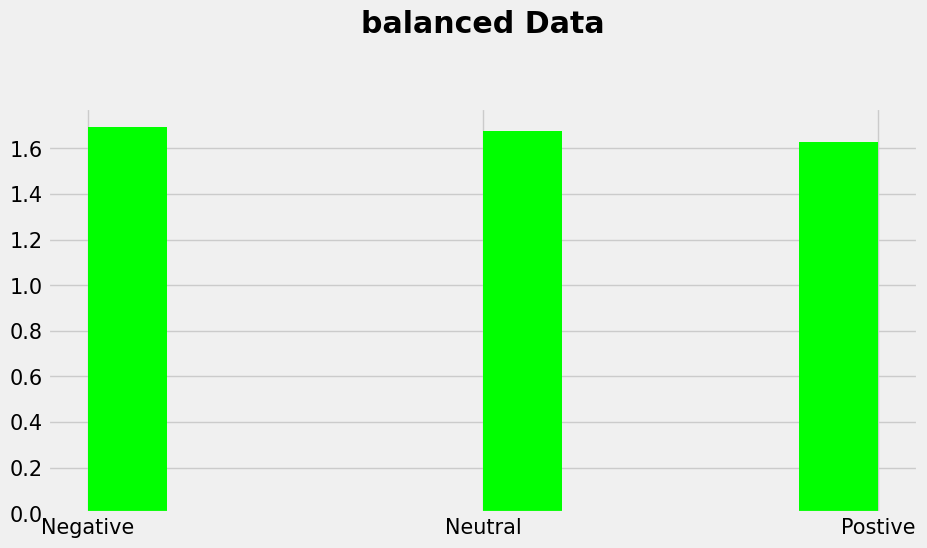

In [89]:
colors = ['lime'] 
  
plt.hist(y_train, 
         density = True,  
         histtype ='barstacked', 
         color = colors)  
  
plt.title('balanced Data\n\n', 
          fontweight ="bold") 
  
plt.show()

## RANDOM FOREST (BAGGING)

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rf = RandomForestClassifier(n_estimators = 120, 
                            random_state = 42,
                            n_jobs = -1,
                            max_features = 'auto')
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

C:\Users\prath\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [92]:
print("Accuracy of Random Forest Classifier:\t", accuracy_score(y_test, rf_pred))

Accuracy of Random Forest Classifier:	 0.8183733670459334


In [93]:
print("Classification Report:\n\n",classification_report(y_test, rf_pred))

Classification Report:

               precision    recall  f1-score   support

    Negative       0.91      0.51      0.66       763
     Neutral       0.67      0.96      0.79       778
     Postive       0.97      0.97      0.97       832

    accuracy                           0.82      2373
   macro avg       0.85      0.81      0.80      2373
weighted avg       0.85      0.82      0.81      2373



In [94]:
print("Confusion Matrix:\n\n", confusion_matrix(y_test, rf_pred))

Confusion Matrix:

 [[391 359  13]
 [ 17 747  14]
 [ 21   7 804]]


<a id = 'mnb'></a>

## MULTINOMIAL NAIVE BAYES

In [95]:
#Multinomial Naive Bayes 
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb_pred = mnb.predict(x_test)

In [96]:
print("Accuracy of Multinomial Naive Bayes:\t", accuracy_score(y_test, mnb_pred))

Accuracy of Multinomial Naive Bayes:	 0.6982722292456806


In [97]:
print("Classification Report:\n\n",classification_report(y_test, mnb_pred))

Classification Report:

               precision    recall  f1-score   support

    Negative       0.54      0.92      0.68       763
     Neutral       0.85      0.19      0.32       778
     Postive       0.89      0.97      0.92       832

    accuracy                           0.70      2373
   macro avg       0.76      0.69      0.64      2373
weighted avg       0.77      0.70      0.65      2373



In [98]:
print("Confusion Matrix:\n\n", confusion_matrix(y_test, mnb_pred))

Confusion Matrix:

 [[703   8  52]
 [577 151  50]
 [ 11  18 803]]


<a id = 'svc'></a>

## SUPPORT VECTOR CLASSIFIER

In [99]:
svc = svm.LinearSVC(multi_class = 'ovr')
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)

C:\Users\prath\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [100]:
print("Accuracy of Support Vector Classifier:\t", accuracy_score(y_test, svc_pred))

Accuracy of Support Vector Classifier:	 0.8162663295406658


In [101]:
print("Classification Report:\n\n",classification_report(y_test, svc_pred))

Classification Report:

               precision    recall  f1-score   support

    Negative       0.90      0.51      0.65       763
     Neutral       0.66      0.96      0.78       778
     Postive       0.98      0.96      0.97       832

    accuracy                           0.82      2373
   macro avg       0.85      0.81      0.80      2373
weighted avg       0.85      0.82      0.81      2373



In [102]:
print("Confusion Matrix:\n\n", confusion_matrix(y_test, svc_pred))

Confusion Matrix:

 [[390 363  10]
 [ 25 745   8]
 [ 16  14 802]]


<a id = 'log'></a>

## LOGISTIC REGRESSION

In [103]:
log_reg = LogisticRegression(solver = 'liblinear', 
                             multi_class = 'ovr', 
                             max_iter = 1000, 
                             random_state = 42, 
                             penalty = 'l1')
log_reg.fit(x_train, y_train)
log_reg_pred = log_reg.predict(x_test)

In [104]:
print("Accuracy of Logistic Regression:\t", accuracy_score(y_test, log_reg_pred))

Accuracy of Logistic Regression:	 0.809102402022756


In [105]:
print("Classification Report:\n\n",classification_report(y_test, log_reg_pred))

Classification Report:

               precision    recall  f1-score   support

    Negative       0.89      0.51      0.65       763
     Neutral       0.66      0.96      0.78       778
     Postive       0.98      0.94      0.96       832

    accuracy                           0.81      2373
   macro avg       0.84      0.80      0.80      2373
weighted avg       0.85      0.81      0.80      2373



In [106]:
print("Confusion Matrix:\n\n", confusion_matrix(y_test,log_reg_pred))

Confusion Matrix:

 [[390 366   7]
 [ 23 747   8]
 [ 23  26 783]]


In [107]:
import pickle
pickle.dump(log_reg, open('sai-r4.pkl', 'wb'))

<a id = 'sgd'></a>

## SGD CLASSIFIER

In [108]:
sgd = SGDClassifier(alpha = 0.00047, random_state = 42)

In [109]:
sgd.fit(x_train, y_train)
sgd_pred = sgd.predict(x_test)

In [110]:
print("Accuracy of SGD Classifier:\t", accuracy_score(y_test, sgd_pred))

Accuracy of SGD Classifier:	 0.8053097345132744


In [111]:
print("Classification Report:\n\n",classification_report(y_test, sgd_pred))

Classification Report:

               precision    recall  f1-score   support

    Negative       0.92      0.48      0.63       763
     Neutral       0.65      0.97      0.78       778
     Postive       0.98      0.95      0.96       832

    accuracy                           0.81      2373
   macro avg       0.85      0.80      0.79      2373
weighted avg       0.85      0.81      0.79      2373



In [112]:
print("Confusion Matrix:\n\n", confusion_matrix(y_test, sgd_pred))

Confusion Matrix:

 [[364 391   8]
 [ 12 757   9]
 [ 18  24 790]]


<a id = 'xgb'></a>

## XGBOOST

In [113]:
xgb_model = xgb.XGBClassifier(
                      learning_rate = 0.01,  
                      colsample_bytree = 0.8,
                      subsample = 0.8,
                      objective = 'multi:softmax', 
                      n_estimators = 100, 
                      reg_alpha = 0.3,
                      max_depth = 4, 
                      gamma = 1,
                      num_class = 3)

In [114]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable
y_train_encoded = label_encoder.fit_transform(y_train)

# Initialize and fit the XGBoost classifier
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train_encoded)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [115]:
xgb_pred = xgb_model.predict(x_test)
print("Accuracy of XGBoost:\t", accuracy_score(y_test, xgb_pred))

Accuracy of XGBoost:	 0.0


In [116]:
ovrc = OneVsRestClassifier(xgb.XGBClassifier())
ovrc.fit(x_train, y_train)

OneVsRestClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))

In [117]:
ovrc_pred = ovrc.predict(x_test)
print("Accuracy of XGBoost (OneVsRest):\t", accuracy_score(y_test, ovrc_pred))

Accuracy of XGBoost (OneVsRest):	 0.8053097345132744


In [118]:
print("Classification Report:\n\n",classification_report(y_test, ovrc_pred))

Classification Report:

               precision    recall  f1-score   support

    Negative       0.90      0.50      0.64       763
     Neutral       0.65      0.96      0.78       778
     Postive       0.98      0.94      0.96       832

    accuracy                           0.81      2373
   macro avg       0.84      0.80      0.79      2373
weighted avg       0.84      0.81      0.80      2373



In [119]:
print("Confusion Matrix:\n\n", confusion_matrix(y_test,ovrc_pred))

Confusion Matrix:

 [[381 372  10]
 [ 22 747   9]
 [ 22  27 783]]


<a id = 'ada'></a>

## ADABOOST

In [120]:
ada_model = OneVsRestClassifier(AdaBoostClassifier())

In [121]:
ada_model.fit(x_train, y_train)

OneVsRestClassifier(estimator=AdaBoostClassifier())

In [122]:
ada_pred = ada_model.predict(x_test)
print("Accuracy of AdaBoost:\t", accuracy_score(y_test, ada_pred))

Accuracy of AdaBoost:	 0.7543194268857986


In [123]:
print("Classification Report:\n\n",classification_report(y_test, ada_pred))

Classification Report:

               precision    recall  f1-score   support

    Negative       0.85      0.38      0.53       763
     Neutral       0.59      0.96      0.73       778
     Postive       0.97      0.91      0.94       832

    accuracy                           0.75      2373
   macro avg       0.81      0.75      0.73      2373
weighted avg       0.81      0.75      0.74      2373



<a id = 'knn'></a>

## KNN CLASSIFICATION

In [124]:
knn = KNeighborsClassifier(n_neighbors = 3).fit(x_train, y_train)

In [125]:
knn_pred = knn.predict(x_test)
print("Accuracy of KNN:\t", accuracy_score(y_test, knn_pred))

Accuracy of KNN:	 0.7197640117994101


In [126]:
print("Classification Report:\n\n",classification_report(y_test, knn_pred))

Classification Report:

               precision    recall  f1-score   support

    Negative       0.68      0.50      0.57       763
     Neutral       0.61      0.98      0.75       778
     Postive       0.99      0.68      0.81       832

    accuracy                           0.72      2373
   macro avg       0.76      0.72      0.71      2373
weighted avg       0.77      0.72      0.71      2373



## PERCEPTRON

In [127]:
per = Perceptron(penalty = 'l1',
                alpha = 0.0005)
per.fit(x_train, y_train)
per_pred = per.predict(x_test)
print("Accuracy of Perceptron:\t", accuracy_score(y_test, per_pred))

Accuracy of Perceptron:	 0.6885798567214496


In [128]:
print("Classification Report:\n\n",classification_report(y_test, per_pred))

Classification Report:

               precision    recall  f1-score   support

    Negative       0.53      0.97      0.68       763
     Neutral       0.76      0.20      0.32       778
     Postive       0.97      0.88      0.92       832

    accuracy                           0.69      2373
   macro avg       0.75      0.69      0.64      2373
weighted avg       0.76      0.69      0.65      2373



## PASSIVE AGGRESSIVE CLASSIFIER

In [129]:
pac = PassiveAggressiveClassifier(class_weight = 'balanced',
                                 C = 0.4)
pac.fit(x_train, y_train)
pac_pred = pac.predict(x_test)
print("Accuracy of Passive Aggressive Classifier:\t", accuracy_score(y_test, pac_pred))

Accuracy of Passive Aggressive Classifier:	 0.7370417193426043


In [130]:
print("Classification Report:\n\n",classification_report(y_test, pac_pred))

Classification Report:

               precision    recall  f1-score   support

    Negative       0.56      0.97      0.71       763
     Neutral       0.90      0.27      0.41       778
     Postive       0.97      0.96      0.97       832

    accuracy                           0.74      2373
   macro avg       0.81      0.73      0.70      2373
weighted avg       0.82      0.74      0.70      2373



## LINEAR DISCRIMINANT ANALYSIS

In [131]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
lda_pred = lda.predict(x_test)
print("Accuracy of LDA:\t", accuracy_score(y_test, lda_pred))

Accuracy of LDA:	 0.7475769068689423


In [132]:
print("Classification Report:\n\n",classification_report(y_test, lda_pred))

Classification Report:

               precision    recall  f1-score   support

    Negative       0.79      0.51      0.62       763
     Neutral       0.61      0.95      0.74       778
     Postive       0.96      0.78      0.86       832

    accuracy                           0.75      2373
   macro avg       0.79      0.75      0.74      2373
weighted avg       0.79      0.75      0.74      2373



## RIDGE CLASSIFIER

In [133]:
rc = RidgeClassifier()
rc.fit(x_train, y_train)
rc_pred = rc.predict(x_test)
print("Accuracy of Ridge Classifier:\t", accuracy_score(y_test, rc_pred))

Accuracy of Ridge Classifier:	 0.7783396544458492


In [134]:
print("Classification Report:\n\n",classification_report(y_test, rc_pred))

Classification Report:

               precision    recall  f1-score   support

    Negative       0.85      0.50      0.63       763
     Neutral       0.63      0.97      0.76       778
     Postive       0.98      0.85      0.91       832

    accuracy                           0.78      2373
   macro avg       0.82      0.77      0.77      2373
weighted avg       0.82      0.78      0.77      2373

